In [1]:
%matplotlib notebook
#En dynamique
from math import cos,pi,sin,atan2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import interact, widgets

<IPython.core.display.Javascript object>


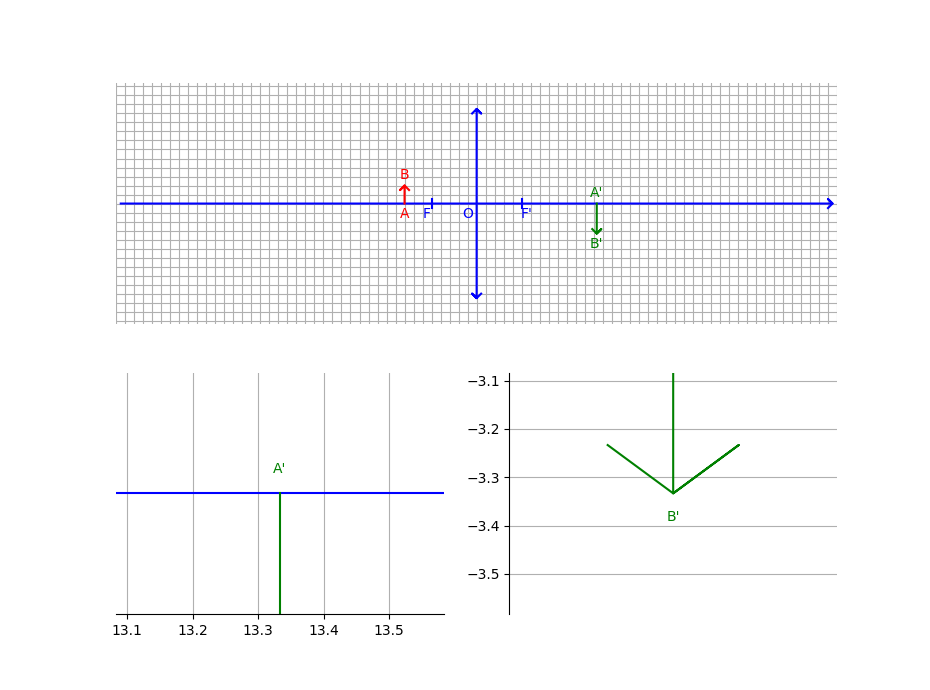

interactive(children=(FloatSlider(value=5.0, description='OFprim', max=10.0, min=5.0, step=0.5), IntSlider(val…

In [25]:
def calculOAprim(OFprim,OA):
    if OFprim==0 or OA==0:
        return 0
    elif abs((1/OFprim + 1/OA))<1e-3:
        return 10000
    else:       
        return 1/(1/OFprim + 1/OA)

def calculAprimBprim(AB,OA,OAprim):
    if OAprim==10000 or OA==0 or AB==0 or OAprim==0:
        return 0
    else:
        return OAprim*AB/OA

fig = plt.figure(figsize=(9.3,6.9))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)
fig.show()

@interact(OFprim=(5,10,0.5),AB=(-5,5,1),OA=(-39,-1,1))
def setparams(OFprim=5.,AB=2.,OA=-8.):
    grid=True
    Objet=True
    Image=True
    Lentille=True
    OAprim =calculOAprim(OFprim,OA)
    AprimBprim = calculAprimBprim(AB,OA,OAprim)
    ax1.clear()
    ax2.clear()
    ax3.clear()
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['left'].set_color('none')
    ax1.spines['bottom'].set_color('none')
    ax1.spines['bottom'].set_position(('data',0))
    ax1.spines['left'].set_position(('data',0))
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')
    ax1.set_xticklabels([""]*31)
    ax1.set_yticklabels(['']*11)
    ax1.axis('equal')
    ax1.set_xticks([-51+i for i in range(103)])
    ax1.set_yticks([-14+i for i in range(29)])
    ax1.xaxis.set_tick_params(color='none') 
    ax1.yaxis.set_tick_params(color='none') 
    
    ax2.spines['right'].set_color('none')
    ax2.spines['top'].set_color('none')
    ax2.spines['left'].set_color('none')
    ax1.plot([-39.5,39.5,39,39.5,39],[0,0,0.5,0,-0.5],"blue")
    ax2.plot([-39.5,39.5,39,39.5,39],[0,0,0.5,0,-0.5],"blue")
    ax3.plot([-39.5,39.5,39,39.5,39],[0,0,0.5,0,-0.5],"blue")
    
    if abs(AprimBprim) < 0.1:
        div = 2
    elif abs(AprimBprim) < 0.25:
        div = 1.5
    else:
        div = 1
        
    if Lentille:
        if OFprim>0:
            df = 0.5
            ax1.plot([-0.5,0,0.5,0,0,-0.5,0,0.5],[10,10.5,10,10.5,-10.5,-10,-10.5,-10],'blue')
        elif OFprim!=0:
            df = -0.5
            ax1.plot([-0.5,0,0.5,0,0,-0.5,0,0.5],[10.5,10,10.5,10,-10,-10.5,-10,-10.5],'blue')
        if OFprim!=0:
            ax1.text(-1.0,-1.2,s='O',color='blue', horizontalalignment='center', verticalalignment='center')
            ax1.text(-(OFprim+df),-1.2,s='F',color='blue', horizontalalignment='center', verticalalignment='center')
            ax1.plot([-OFprim,-OFprim],[0.5,-0.5],'blue')
            ax1.text(OFprim+df,-1.2,s="F'",color='blue', horizontalalignment='center', verticalalignment='center')
            ax1.plot([OFprim,OFprim],[0.5,-0.5],'blue')
    if Objet:
        if AB<0 and OA!=0:
            ax1.plot([OA,OA,OA+0.5,OA,OA-0.5],[0,AB,AB+0.5,AB,AB+0.5],'red')
            ax1.text(OA,AB-1.2,s="B",color='red', horizontalalignment='center', verticalalignment='center')
            ax1.text(OA,1.2,s="A",color='red', horizontalalignment='center', verticalalignment='center')
        elif OA!=0 and AB!=0:
            ax1.plot([OA,OA,OA-0.5,OA,OA+0.5],[0,AB,AB-0.5,AB,AB-0.5],'red')
            ax1.text(OA,AB+1.2,s="B",color='red', horizontalalignment='center', verticalalignment='center')
            ax1.text(OA,-1.2,s="A",color='red', horizontalalignment='center', verticalalignment='center')
    if Image and AprimBprim!=0:
        if AprimBprim<0:
            ax1.plot([OAprim,OAprim,OAprim+0.5,OAprim,OAprim-0.5],[0,AprimBprim,AprimBprim+0.5,AprimBprim,AprimBprim+0.5],'green')
            ax1.text(OAprim,AprimBprim-1.2,s="B'",color='green', horizontalalignment='center', verticalalignment='center')
            ax1.text(OAprim,1.2,s="A'",color='green', horizontalalignment='center', verticalalignment='center')
            ax2.plot([OAprim,OAprim],[0,10*AprimBprim],'green')
            ax2.text(OAprim,0.02,s="A'",color='green', horizontalalignment='center', verticalalignment='center')
            ax3.plot([OAprim,OAprim,OAprim+0.1/div,OAprim,OAprim-0.1/div],[0,AprimBprim,AprimBprim+0.1/div,AprimBprim,AprimBprim+0.1/div],'green')
            ax3.text(OAprim,AprimBprim-0.05/div,s="B'",color='green', horizontalalignment='center', verticalalignment='center')

        else:
            ax1.plot([OAprim,OAprim,OAprim-0.5,OAprim,OAprim+0.5],[0,AprimBprim,AprimBprim-0.5,AprimBprim,AprimBprim-0.5],'green')
            ax1.text(OAprim,AprimBprim+1.2,s="B'",color='green', horizontalalignment='center', verticalalignment='center')
            ax1.text(OAprim,-1.2,s="A'",color='green', horizontalalignment='center', verticalalignment='center') 
            ax2.plot([OAprim,OAprim,OAprim-0.5,OAprim,OAprim+0.5],[0,AprimBprim,AprimBprim-0.5,AprimBprim,AprimBprim-0.5],'green')
            ax2.text(OAprim,-0.02,s="A'",color='green', horizontalalignment='center', verticalalignment='center')
            ax3.plot([OAprim,OAprim,OAprim-0.1/div,OAprim,OAprim+0.1/div],[0,AprimBprim,AprimBprim-0.1/div,AprimBprim,AprimBprim-0.1/div],'green')
            ax3.text(OAprim,AprimBprim+0.05/div,s="B'",color='green', horizontalalignment='center', verticalalignment='center')

    
    
    
    ax1.set_xlim([-40,40])
    ax1.set_ylim([-13,13])
    ax2.set_ylim([-0.1,0.1])
    ax2.set_xticks([int(OAprim)-1.5+i/10 for i in range(31)])
    ax2.set_yticks([])
    ax2.spines['right'].set_color('none')
    ax2.spines['top'].set_color('none')
    ax2.spines['left'].set_color('none')
    if AprimBprim!=0:
        ax2.set_xlim([OAprim-0.25,OAprim+0.25])
    else:
        ax2.set_xlim([-0.25,+0.25])

    ax3.set_xticks([])
    ax3.set_yticks([int(AprimBprim)-1.5+i/10 for i in range(31)])
    ax3.set_ylim([AprimBprim-0.25/div,AprimBprim+0.25/div])
    ax3.spines['right'].set_color('none')
    ax3.spines['top'].set_color('none')
    ax3.spines['bottom'].set_color('none')
    if AprimBprim!=0:
        ax3.set_xlim([OAprim-0.25/div,OAprim+0.25/div])
    else:
        ax3.set_xlim([-0.25,+0.25])
    ax1.grid()
    ax2.grid()
    ax3.grid()

    
  
setparams()

    
